<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [10]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


### **Task 1: Become familiar with the dataset.**

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [11]:
boston_df.head(20)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


Statistical summary of the dataset 

In [12]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [13]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


### **Task 2: Generate Descriptive Statistics and Visualizations**

**1. For the "Median value of owner-occupied homes" provide a boxplot**

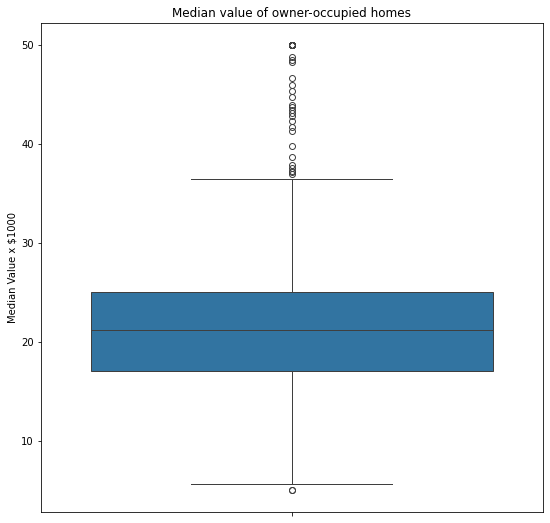

In [32]:
plt.figure(figsize=(9, 9))
ax1 = sns.boxplot(y = "MEDV", data = boston_df)
ax1.set_ylabel("Median Value x $1000")
ax1.set_title('Median value of owner-occupied homes')
plt.show()

**2. Provide a  bar plot for the Charles river variable**

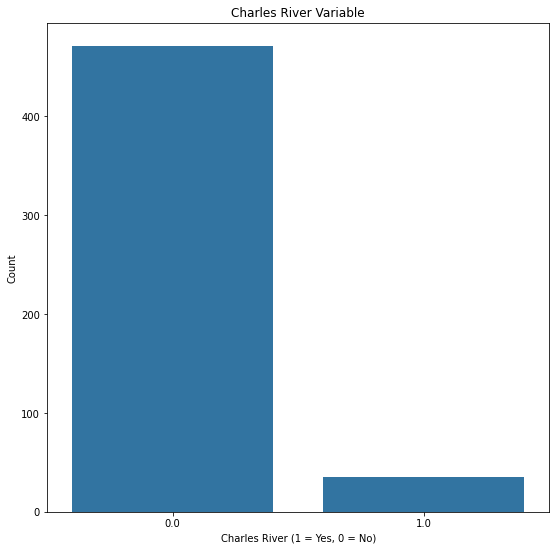

In [33]:
plt.figure(figsize=(9, 9))
ax2 = sns.countplot(x=boston_df['CHAS'], )
ax2.set_title('Charles River Variable')
plt.xlabel('Charles River (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()


**3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)**

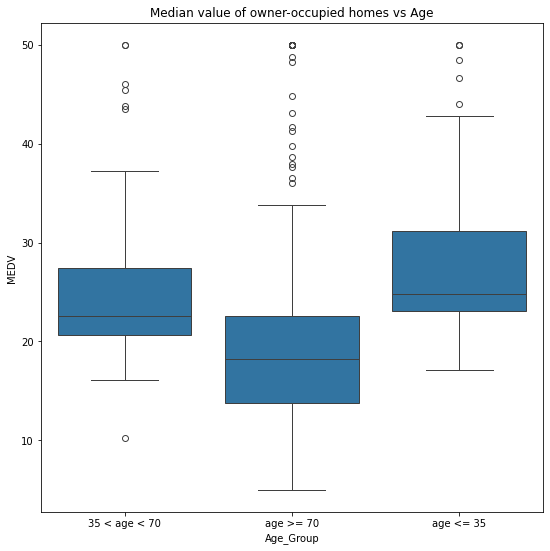

In [34]:
#Separate into groups
boston_df.loc[boston_df['AGE'] <= 35, 'Age_Group'] = "age <= 35"
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = "35 < age < 70"
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = "age >= 70"

#Plot the Graph
plt.figure(figsize=(9, 9))
ax3 = sns.boxplot(x = 'Age_Group', y = 'MEDV', data = boston_df)
ax3.set_title("Median value of owner-occupied homes vs Age")
plt.show()


**4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?**

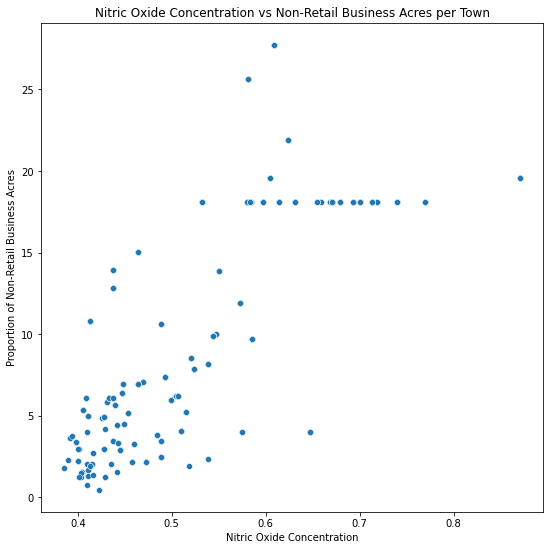

In [35]:
plt.figure(figsize=(9, 9))
ax4 = sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'])
ax4.set_title('Nitric Oxide Concentration vs Non-Retail Business Acres per Town')
plt.xlabel('Nitric Oxide Concentration')
plt.ylabel('Proportion of Non-Retail Business Acres')
plt.show()

**5. Create a histogram for the pupil to teacher ratio variable**

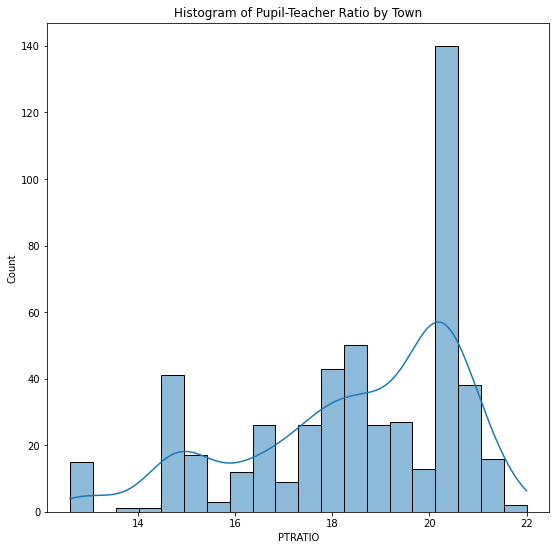

In [26]:
plt.figure(figsize=(9, 9))
ax5 = sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
ax5.set_title('Histogram of Pupil-Teacher Ratio by Town')
plt.show()

### **Task 3: Use the appropriate tests to answer the questions provided.**

**1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**

Hypotheses:

$H_0$ = there is no significant difference in the median value of houses bounded by the Charles river.
<br>
$H_1$ = there is a significant difference in the median value of houses bounded by the Charles river.


In [59]:
bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_value = scipy.stats.ttest_ind(bounded, not_bounded, equal_var=True)  

print(f"T-Statistic: {t_stat:.3f}")
print(f"P-Value: {p_value:.3e}")

T-Statistic: 3.996
P-Value: 7.391e-05


With $\alpha = 0.05$, and a p value of $p = 7.391 \times 10^{-5} < \alpha$, we reject the null hypothesis. Then, we can conclude there is a significant difference in the median value of houses bounded by the Charles river.

**2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**


Hypotheses:

$H_0$ = There is no difference in the median value of houses for each proportion of occupied units built prior to 1940
<br>
$H_1$ = There is a difference in the median value of houses for each proportion of occupied units built prior to 1940

In [54]:
#Separate into the 3 groups again, and save them in variables.

g1 = boston_df[boston_df['Age_Group'] == "age <= 35"]['MEDV']
g2 = boston_df[boston_df['Age_Group'] == "35 < age < 70"]['MEDV']
g3 = boston_df[boston_df['Age_Group'] == "age >= 70"]['MEDV']

#Run the ANOVA
f_statistic, p_value = scipy.stats.f_oneway(g1, g2, g3)
print(f"F_Statistic: {f_statistic:.3f}, P-Value: {p_value:.3e}")

F_Statistic: 36.408, P-Value: 1.711e-15


With $\alpha = 0.05$, and a p value of $p = 1.711 \times 10^{-15} << \alpha$, we reject the null hypothesis. Then, we can conclude There is a difference in the median value of houses for each proportion of occupied units built prior to 1940.

**3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**

Hypotheses:

$H_0$: Nitric Oxide concentration is not correlated with the proportion of non-retail business acres per town
<br>
$H_1$: Nitric Oxide concentration is correlated with the proportion of non-retail business acres per town

In [58]:
correlation, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Correlation: {correlation:.3f}, P-Value: {p_value:.3e}")

Correlation: 0.764, P-Value: 7.913e-98


With $\alpha = 0.05$, and a p value of $p = 7.913 \times 10^{-98} \approx 0 << \alpha$, we reject the null hypothesis. Then, we can conclude Nitric Oxide concentration is correlated with the proportion of non-retail business acres per town.

**4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**

Hypotheses:

$H_0$: Additional weighted distance to the five Boston employment centres has no impact on the median value of owner occupied homes.
<br>
$H_1$: Additional weighted distance to the five Boston employment centres has an impact on the median value of owner occupied homes

In [62]:
X = boston_df ['DIS']
y = boston_df ['MEDV']
X = sm.add_constant(X)

regression = sm.OLS(y,X).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 08 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        21:37:34   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With $\alpha = 0.05$, and a p value of $p  \approx 0 << \alpha$, we reject the null hypothesis. Then, we can conclude that additional weighted distance to the five Boston employment centres has an impact on the median value of owner occupied homes.
Furthermore, The coeficient for the weighted distance is 1.0916. This means, for each unit increase in the weighted distance to the five Boston employment centers, the median value of owner-occupied homes increases by 1.0916 thousand dollars.